<center>
    <h1> ILI286 - Computación Científica II </h1>
    <h2> Tarea 2 </h2>
    <h2> [S]cientific [C]omputing [T]eam </h2>
    <h3> _19 de Marzo 2017_ </h3>
</center>

# Tabla de Contenidos
* [1.- Objetivos](#obj)
* [2.- Introducción](#intro)
* [3.- Desarrollo](#desarrollo)
    * [3.1- Analisis de los métodos](#analisis)
    * [3.2- Aplicando lo aprendido](#aplicacion)
* [4.- Instrucciones](#instr)
* [5.- Referencias](#ref)

<div id='obj' />
# 1. _Objetivos_

Para la presente tarea se tiene por objetivos:

* Conocer y programar los métodos vistos en clases para calcular los valores propios de una matriz. 
* Analizar como se comportan estos algoritmos según distintas variables.
* Aplicar uno de estos algoritmos a un problema real.

<div id='intro' />
# 2. _Introducción_ 


Existen muchos problemas de la informática donde los _valores y vectores propios_ juegan un papel importante al momento de obtener información valiosa. Uno de los elementos de mayor relevancia es el **valor propio dominante** de una matriz, y en este laboratorio mediante un análisis de tiempo y precisión veremos distintas técnicas para poder obtenerlo de forma rápida y concisa. 

<div id='desarrollo' />
# 3. _Desarrollo_ 

<div id='analisis' />
## 3.1 _Análisis de los métodos_

1.- Deberá implementar los 4 métodos vistos en clases (_Power Iteration_, _Rayleigh Quotient Iteration_ y _Unshifted QR Algorithm_).Puede usar los notebooks vistos en clases, y es libre de realizar las modificaciones que estime pertinente. Para probarlos, necesitará de una función que le retorne una matriz simétrica definida positiva (y por lo tanto _invertible_), y conocer sus valores propios. Esto lo puede lograr realizando lo siguiente:

 * Creamos una matriz cuadrada _A_ de números aleatorios entre 0 y 1, con el tamaño que deseé para la matriz final.
 * Descomponemos la matriz _A_ mediante _QR_ (_A_ = QR ). 
 * Luego, construiremos una matriz diagonal _D_ con los valores propios que usaremos mas adelante. Puede usar la siguiente fórmula para los valores de la diagonal:
   * $\large \lambda_n = \frac{1}{2n + 2}$, $\mbox{ } n = 0,1,2,\ldots$
 * Finalmente crearemos la matriz _B_ = _QDQ*_, la cual sera una matriz simétrica definida positiva y con valores propios conocidos.
 
   Nota: Use la misma semilla para crear las matrices aleatorias y realizar la tarea (para esto puede usar la función de numpy _numpy.random.seed_ ).
   
2.- A continuación, se le pide estimar el tiempo que demora cada algoritmo en una iteración. Para esto, cree matrices $A_{nxn}$ para
_n_ = 10, 100, 500 y 1000, luego guarde el tiempo que demora cada algoritmo en ejecutar una iteración. Se recomienda que repita varias veces el experimento por cada método y calcule el promedio de los tiempos guardados. Muestre los resultados obtenidos en un único gráfico. Para la medición de tiempos puede usar la función _timeit_ $^{1}$ o _time.time()_ $^{2}$.

Para apreciar de mejor forma los resultados, se debe hacer uso de función _semilogy_ para gráficar. A continuación se presenta un pequeño ejemplo de como usar esta función:

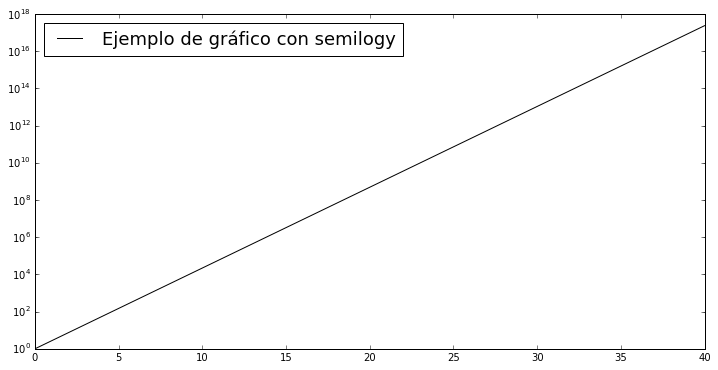

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

#Sets de datos
x = np.arange(0, 50, 10)
y = np.exp(x)

plt.figure(figsize=(12,6))
plt.semilogy(x, y, 'k-',label = 'Ejemplo de gráfico con semilogy')
#Si se quiere colocar una etiqueta, puede usar la funcion legend
plt.legend(loc = 2,prop={'size':18})
plt.show()

3.- Analice que tan rápido convergen sus métodos para _i_ iteraciones. Para esto, calcule el tiempo que demoran los algoritmos en llegar a un error de $10^{-10}$. Para calcular el error, puede usar la expresión $error = |\lambda_{real} - \lambda_{método}^{(i)}|$, donde $\lambda_{real}$ es el valor propio dominante e _i_ es el número de iteración. Se recomienda que repita varias veces el experimento por cada método y calcule el promedio de los tiempos guardados. Posteriormente, deberá realizar un único gráfico tiempo vs tamaño de la matriz (n = 10,100,500,1000) donde el eje _x_ es la dimensión, y el eje _y_ será el tiempo que demora su algoritmo llegar al error propuesto. 

4.- Finalmente, compare los 2 resultados de tiempo y explique las diferencias que encuentre. Además, mencione las ventajas y desventajas que presenta cada método según su análisis. ¿Cuál algoritmo es mejor?¿Bajo que argumentos?

<div id='aplicacion' />
## 3.2 _Aplicando lo aprendido_

* Una de las aplicaciones que se le pueden dar a los vectores y valores propios es el estudio y resolución de las **ecuaciones de diferencia**. Estas ecuaciones son similares a las _ecuaciones diferenciales_, pero usando sucesiones en vez de funciones (con un número finito de pasos). Un ejemplo de esto son los problemas de **crecimiento exponencial** (como el crecimiento de bacterias). La expresión general de la relación de recurrencia describe este modelo como:

    $$ P_{n+1} = KP_n $$

>Donde $P_0$ es la población inicial, y _K_ la constante de crecimiento. Su solución es:

$$ P_n = K^{n}P_0 , \mbox{ }n=1,2,3, \ldots$$

>Esto se logra ya que reemplazando en nuestra primera ecuación por la condición de población inicial, nos queda:

$$ P_1 = KP_0 $$

>Si seguimos avanzando, nos damos cuenta que $P_2 = KP_1$, y ya que conocemos $P_1$, esto nos queda que $P_2 = K^{2}P_0$, y haciendo esto _n_ veces llegamos a la solución propuesta anteriormente.

>En los problemas de crecimiento y reproducción de especies, un factor muy importante a analizar es la _edad_. Un modelo que nos ayuda a entender y resolver esta problemática es la **matriz de Leslie**. El problema en notación matricial tiene la siguiente estructura:

$$ x^{(n+1)} = Ax^{(n)}, \mbox{ } n \geq 0 $$

>Donde _A_ es la matriz de Leslie y _x_ un vector, con la siguiente forma:

$$ A = \begin{pmatrix} F_1 & F_2 & \cdots & F_{k-1} & F_k \\ P_0 & 0 & \cdots & 0 & 0 \\ 0 & P_1 & \cdots & 0 & 0 \\ \vdots & \vdots & \ddots & \vdots & \vdots \\ 0 & 0 & \cdots & P_{k-1} & 0 \end{pmatrix}, x^{(n)} = \begin{pmatrix} x_0^{(n)} \\ x_1^{(n)} \\ \vdots \\ x_k^{(n)} \end{pmatrix}$$

>Donde:
>* $x_{i}^{(n)}$ : hembras de edad _i_ vivas en el instante _n_.
>* $P_i$ : fracción de hembras de edad _i_ que seguiran vivas un año después.
>* $F_i$ : número medio de crías hembras nacidas de una hembra de edad _i_.

>Siendo asi, se propone el siguiente problema:

>_Supongamos que una población de animales hembras está dividida en dos clases de edad. En cada periodo el 8 % de la primera pasa a la segunda. El número medio de crías hembras de las hembras de la primera clase es de 1,5 y el de la segunda es de 2.
Además, inicialmente hay 100 hembras de cada clase de edad_. 

> La matriz _A_ entonces tiene la siguiente forma:
$$ A = \begin{pmatrix} 1.5 & 2 \\ 0.08 & 0  \end{pmatrix}$$

> Teniendo esto en cuenta: 
>* Encuentre una expresión explícita para el vector $x^{(n)}$, y grafique el vector para 10 instantes ($n=1,2,\ldots, 10$). Además, escoja uno de sus algoritmos para encontrar el **valor propio dominante** de la matriz de Leslie. ¿Cual es la relación que existe entre ambos métodos?

   >> _Hint_: _Fíjese como evoluciona el vector $x^{(n)}$ a traves de los instantes, ¿Aumenta o disminuye?_.

   >>_Hint2_: _Para una ecuación $u_n = A^n u_0$, si A es diagonalizable puede escribirse como $c_1 \lambda_1^n x_1 + c_2 \lambda_2^n x_2 + \ldots + c_k \lambda_k^n x_k $, con$ c_k$ y $x_k$ elementos conocidos. Si $\lambda_1$ es el valor propio dominante, ¿Qué se puede deducir de la expresión $c_1 \lambda_1^{\large\textbf{n}} x_1$_ ?
   
>* Analice como se acerca el vector $x^{(n)}$ al _vector propio dominante_. Para esto, realice un gráfico de iteraciones vs distancia al vector dominante, donde esta distancia se obtiene como :$ \text{ distancia } = | \hat{V}_{1} - \hat{x}^{k} | $, donde $\hat{V}_1$ es el vector propio dominante **normalizado**, y $\hat{x}^{(k)}$ es el vector $x$ en el instante _k_ **normalizado**. Si ahora nos abstraemos del problema, permitiendo que los valores del vector de instancia inicial tenga valores negativos, ¿Como se comporta el vector $x^{(n)}$ a traves de los instantes?


* Proponga usted un problema donde son ocupados los vectores y valores propios, y proponga un algoritmo que lo resulva. Sea detallado tanto en su problema como en su algoritmo.

<div id='instr' />
# 4. _Instrucciones_:
 
 
* La estructura del laboratorio es la siguiente:
     1. Título, nombre de estudiante, email y rol.
     2. Introducción.
     3. Desarrollo y análisis de resultados.
     4. Conclusiones.
     5. Referencias.
* El laboratorio debe ser realizado en `Jupyter` notebook (`Python3`).
* Se evaluará la correcta utilización de librerias `NumPy`, `SciPy`, `SymPy`, `Matplotlib` y `ipywidgets`, así como la correcta implementación de algoritmos vectorizados cuando se indique.
* El archivo de entrega debe denominarse Tarea1-rol.tar.gz, y debe contener un directorio con todos los archivos necesarios para ejecutar el notebook, junto con un archivo README indicando explícitamente las bibliotecas extras utilizadas.
* El descuento por día de atraso será de $30$ puntos, con un máximo de 1 día de atraso. No se recibirán entregas después de este día.
* El trabajo es personal, no se permite compartir código, aunque sí se sugiere discutir aspectos generales con sus compañeros. En caso de sospecha de copia, se citará a los involucrados a defender sus conocimientos de manera presencial, evaluación cuya nota reemplazará la obtenida en la tarea.
* El no seguir estas instrucciones, implica descuentos en su nota obtenida.

<div id='ref' />
# 5. _Referencias_:

* 1.- Uso y ejemplos de _timeit_:
 - https://docs.python.org/2/library/timeit.html
* Magic _timeit_:
 - http://stackoverflow.com/questions/29280470/what-is-timeit-in-python
* 2.- Uso de libreria _time_:
 - https://docs.python.org/2/library/time.html